In [ ]:
# pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("fashion-mnist_train.csv") # Unloading data
df = df.iloc[:25000] # Passsing down the first 25K Images

Y = np.array(df['label']).astype(int)  # Output labels
X = np.array(df.drop('label',axis = 1)) / 255 # input 

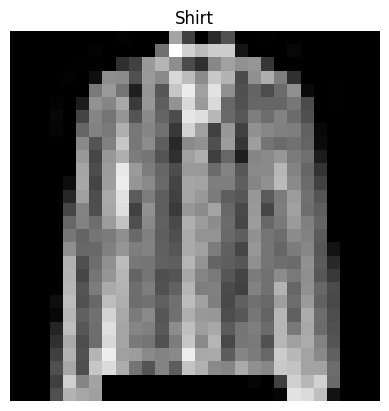

In [ ]:
fashion = {
    0 : "T-shirt",
    1 : "Trousers",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
} # turning the labels to the fashion item

def show_image(index): # showcasing the images
    image = np.array(X[index]).reshape((28,28)) # Selecting the Image of the particular index
    plt.title(fashion[Y[index]]) # Giving the name to the corresponding image
    plt.imshow(image,cmap='grey') # Showing the Image
    plt.axis('off') # Turnin off the axis
    plt.show()

show_image(1011)

In [ ]:
def Relu(Z): 
    # ReLU adds non-linearity so the network can learn complex patterns
    return np.maximum(Z,0) # Z if Z > 0 else 0

def softmax(Z):
    #  Softmax converts logits to class probabilities
    exp_z = np.exp(Z - np.max(Z, axis=0, keepdims=True)) # it helps to prevent exploit of the exp
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y].T # it turns the Y labels to the encoded vector 
# for example Y label is 3, one_hot_code will be [0 0 0 1 0 0 0 0 0 0] 

In [25]:
# Iniziatlising the weights and biases
w1 = np.random.randn(64, 784) * np.sqrt(2/784)  # the Dim of the input layer is 784 as the image is 28 by 28 and there are 64 neurons in the first hidden layer
b1 = np.zeros((64, 1)) # Each nueron has ts own biases 
w2 = np.random.randn(32, 64) * np.sqrt(2/64) # Second hidden layer has 32 layer and it nueron has it own weigths
b2 = np.zeros((32, 1)) # Each nueron has ts own biases 
w3 = np.random.randn(10, 32) * np.sqrt(2/32) # Output layer with 10 neurons as we have 10 items to predict
b3 = np.zeros((10, 1)) 

data = np.load("fashion_ann_weights.npz")
w1, b1 = data["w1"], data["b1"]
w2, b2 = data["w2"], data["b2"]
w3, b3 = data["w3"], data["b3"]


In [24]:
learning_rate = 0.032 # Learning rate is the rate the Model will change its weights and biases. It should not be very high or very low 
acc = []
iterations = []
iteration = 250 # Number of Time our models change its weights and learn from the mistakes
m = X.shape[0]
for i in range(iteration):
    # forward propogation
    Z1 = w1 @  X.T + b1 # Passing the input to the first hidden layer
    A1 = Relu(Z1) # Applying the activation function to the first hdden layer

    Z2 = w2 @ A1 + b2 # The output from the first hidden layer is bieng passed to the seocnd hidden layer
    A2 = Relu(Z2) # applying the activation function the second hidden layer

    Z3 = w3 @ A2 + b3 #  The output from the second hidden layer is being passed to the output layer
    A3 = softmax(Z3) # It will calculate the probability that the input image is what?

    Y_one_hot = one_hot_encode(Y) # One hot coding the Y 

    # This is manually derived on Paper
    dZ3 = A3 - Y_one_hot
    dw3 = dZ3 @ A2.T / 15000
    db3 = np.sum(dZ3,keepdims=True,axis = 1) / m

    dA2 = w3.T @ dZ3
    dZ2 = dA2 * (Z2 > 0)
    dw2 = dZ2 @ A1.T / 25000
    db2 = np.sum(dZ2,keepdims=True,axis = 1) / m

    dA1 = w2.T @ dZ2
    dZ1 = dA1 * (Z1 > 0)
    dw1 = dZ1 @ X / 15000
    db1 = np.sum(dZ1,keepdims=True,axis = 1) / m

    # Updating the weigths and Biases
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    w3 -= learning_rate * dw3
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    b3 -= learning_rate * db3 

    prediction = np.argmax(A3,axis = 0) # It will give the index of the highest probability
    accuracy = np.mean(prediction == Y) * 100 

    if i % 10 == 0:
        print(f"itearations: {i} accuracy: {accuracy:.2f}")
        acc.append(accuracy)
        iterations.append(i)
       

itearations: 0 accuracy: 89.81
itearations: 10 accuracy: 89.76
itearations: 20 accuracy: 89.78
itearations: 30 accuracy: 89.83
itearations: 40 accuracy: 89.88
itearations: 50 accuracy: 89.92
itearations: 60 accuracy: 89.95
itearations: 70 accuracy: 89.94
itearations: 80 accuracy: 89.94
itearations: 90 accuracy: 89.99
itearations: 100 accuracy: 89.99
itearations: 110 accuracy: 90.03
itearations: 120 accuracy: 89.93
itearations: 130 accuracy: 89.97
itearations: 140 accuracy: 89.99
itearations: 150 accuracy: 90.07
itearations: 160 accuracy: 90.02
itearations: 170 accuracy: 90.01
itearations: 180 accuracy: 89.97
itearations: 190 accuracy: 90.03
itearations: 200 accuracy: 89.97
itearations: 210 accuracy: 90.00
itearations: 220 accuracy: 89.99
itearations: 230 accuracy: 89.99
itearations: 240 accuracy: 90.03


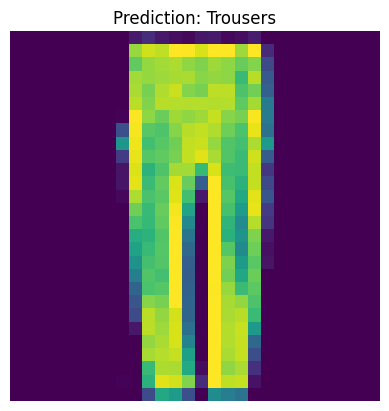

'Trousers'

In [26]:
def predict(index):
    x = X[index].reshape(1,-1) # Input is One image at a time
    # Forward propogation
    Z1 = w1 @  x.T + b1
    A1 = Relu(Z1) 

    Z2 = w2 @ A1 + b2
    A2 = Relu(Z2) 

    Z3 = w3 @ A2 + b3
    A3 = softmax(Z3) 

    prediction = np.argmax(A3, 0)
    image = np.array(X[index]).reshape((28,28))
    plt.title(f"Prediction: {fashion[prediction.item()]}")
    plt.imshow(image,)
    plt.axis('off')
    plt.show()
    return fashion[Y[index]] # Original Label
    
predict(69)

In [18]:
np.savez("fashion_ann_weights.npz", w1=w1, b1=b1, w2=w2, b2=b2, w3=w3, b3=b3)
